In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_morphology(swc_file,dst_func='y-coord',ax=None,max_no_points=np.inf):
    morpho = np.loadtxt(swc_file)
    npoints = int(np.min([max_no_points,morpho.shape[0]]))
    pt_id = np.array(map(int,morpho[:,0]))
    pt_type = morpho[:,1]
    xyz = morpho[:,2:5]
    radius = morpho[:,5]
    parent_id = np.array(map(int,morpho[:,-1]))
    if dst_func == 'y-coord':
        dst = np.abs(xyz[:,1])
    elif dst_func == 'euclidean':
        dst = np.sqrt(np.sum(xyz**2,axis=1))
    else:
        raise('Unknown distance "%s"' % dst_func)
    max_dst = np.ceil(np.max(dst))
    cmap = plt.get_cmap('jet',int(max_dst))
    if ax is None:
        fig = plt.figure()
        ax = fig.gca()
    for i in range(1,npoints):
        idx, = np.where(pt_id == parent_id[i])
        ax.plot(xyz[[i,idx],0],xyz[[i,idx],1],color=cmap(int(dst[i])),lw=morpho[i,5])
    return ax

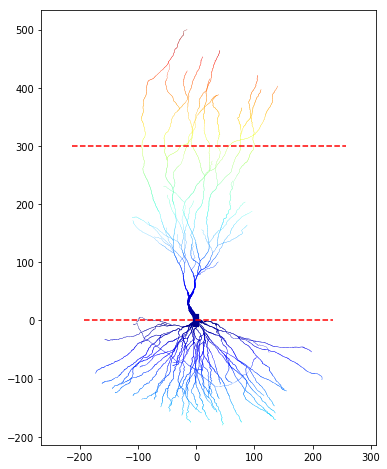

In [7]:
swc_file = '/Users/daniele/Postdoc/Research/Janelia/morphologies/FINAL/thorny/DH070813-.Edit.scaled.converted.swc'
fig = plt.figure(figsize=(6,8))
ax = fig.gca()
plot_morphology(swc_file,'y-coord',ax)
ax.plot(ax.get_xlim(),[0,0],'r--')
ax.plot(ax.get_xlim(),[300,300],'r--')
plt.axis('equal')
plt.show()

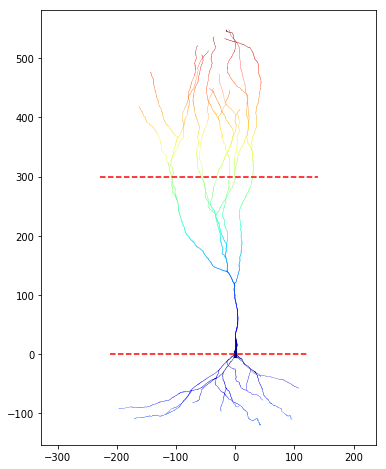

In [6]:
swc_file = '/Users/daniele/Postdoc/Research/Janelia/morphologies/FINAL/a-thorny/DH070613-1-.Edit.scaled.converted.swc'
fig = plt.figure(figsize=(6,8))
ax = fig.gca()
plot_morphology(swc_file,'y-coord',ax)
ax.plot(ax.get_xlim(),[0,0],'r--')
ax.plot(ax.get_xlim(),[300,300],'r--')
plt.axis('equal')
plt.show()